In [1]:
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil
from fenics import *

import scipy.io as sp
from __future__ import print_function
import mat4py as m4p
import matplotlib.pyplot as plt
import numpy as np
import dolfin as dl
from mat4py import loadmat
from dolfin.cpp.mesh import *

import dolfin as dl
import scipy.io as sp
from mshr import *
import numpy as np
from mshr import *
import ufl
from dolfin import *
from dolfin.cpp.mesh import *
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mat4py as m4p
import sys



import logging
logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)


In [2]:
#geometry=Rectangle(dl.Point(0.0, 0.0), dl.Point(1, 1))
#mesh = (generate_mesh(geometry,40))

mesh = dl.refine(UnitSquareMesh(30,30))
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
tol = 1E-14
u_D = Expression('0', degree=2)
def boundary_S(x):
    return  near(x[1], 0.5, tol) and (x[0] > 0.5)

bc_S = DirichletBC(V, u_D, boundary_S)

def boundary_L(x):
    return  near(x[0], 0.0, tol) 

bc_L = DirichletBC(V, u_D, boundary_L)

def boundary_R(x):
    return near(x[0], 1.0, tol) 

bc_R = DirichletBC(V, u_D, boundary_R)

def boundary_B(x):
    return  near(x[1], 0.0, tol) 

bc_B = DirichletBC(V, u_D, boundary_B)

def boundary_T(x):
    return  near(x[1], 1.0, tol) 

bc_T = DirichletBC(V, u_D, boundary_T)

bcs = [ bc_L, bc_R, bc_B, bc_T]

961

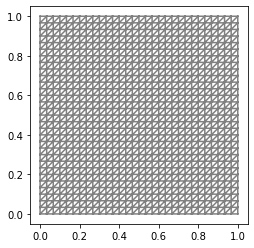

In [15]:
plot(mesh)
len(mesh.coordinates())

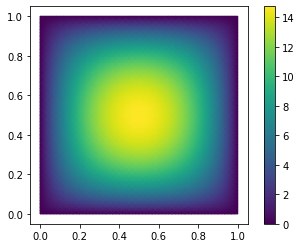

In [3]:
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(200.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution

u = Function(V)


solve(a == L, u, bcs)



#A,b = assemble_system(a,L,bcs)

#U = u.vector()
#solve(A,U,b)

# Plot solution and mesh
c=plot(u,mode='color')
plt.colorbar(c)
plt.show()

In [17]:
# Create model constraint matrix A, load vector b, coordinates x

dof_coordinates = V.tabulate_dof_coordinates() 
n = V.dim()                                                                      
d = mesh.geometry().dim()    

dof_coordinates.resize((n, d))    

#A,b = assemble_system(a,L,bcs)
A = assemble(a)
b = assemble(L)
[bc.apply(A,b) for bc in bcs]
AA=A.array()

c_train = dof_coordinates

b_new=np.zeros(len(c_train))
for i in range(len(c_train)):
    b_new[i]=b[i]




solution_train=np.zeros(len(c_train))
for i in range(len(c_train)):
    solution_train[i]=u(c_train[i])
    #solution_train[i]=u.vector()[i]

In [18]:
solution_train[v]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.77493704e-30,
       -1.42151511e-15, -6.39488462e-14, -2.46376561e-15, -2.55351296e-15,
       -2.02017825e-15,  1.72563323e-31, -1.46735788e-15,  6.21724894e-15,
       -1.33134951e-15,  4.44089210e-16,  6.90650620e-16,  8.88178420e-16,
       -9.05910647e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.28139857e-16,  0.00000000e+00,  3.72741441e-15, -5.12329432e-16,
        0.00000000e+00,  5.11949315e-16,  1.58349176e-16,  0.00000000e+00,
        3.98666029e-16,  3.33233512e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.11077837e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.57363380e-16,  0.00000000e+00,
       -1.08813056e-15,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [6]:
b_new

array([0.33333333, 1.        , 1.        , 1.        , 2.        ,
       1.        , 1.        , 2.        , 2.        , 1.        ,
       1.        , 2.        , 2.        , 2.        , 1.        ,
       1.        , 2.        , 2.        , 2.        , 2.        ,
       1.        , 1.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 1.        , 1.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       1.        , 1.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 1.        ,
       1.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 1.        ,
       0.66666667, 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       0.66666667, 1.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.     

In [53]:
np.matmul()

array([[-2.00159983e+14, -2.00159983e+14, -2.00159983e+14, ...,
        -2.00159983e+14, -2.00159983e+14, -2.00159983e+14],
       [-2.00159983e+14, -2.00159983e+14, -2.00159983e+14, ...,
        -2.00159983e+14, -2.00159983e+14, -2.00159983e+14],
       [-2.00159983e+14, -2.00159983e+14, -2.00159983e+14, ...,
        -2.00159983e+14, -2.00159983e+14, -2.00159983e+14],
       ...,
       [-2.00159983e+14, -2.00159983e+14, -2.00159983e+14, ...,
        -2.00159983e+14, -2.00159983e+14, -2.00159983e+14],
       [-2.00159983e+14, -2.00159983e+14, -2.00159983e+14, ...,
        -2.00159983e+14, -2.00159983e+14, -2.00159983e+14],
       [-2.00159983e+14, -2.00159983e+14, -2.00159983e+14, ...,
        -2.00159983e+14, -2.00159983e+14, -2.00159983e+14]])

In [10]:
np.linalg.norm(C-b_new)

2.1923743797205434e-10

In [11]:
solution_train

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.992007221626405e-16,
 0.0,
 0.0,
 0.0,
 2.5011301109911616e-15,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -6.602126253104273e-13,
 5.329070518200759e-14,
 7.815970093361102e-14,
 0.0,
 -9.296267459527977e-14,
 -1.0214051826551454e-14,
 0.0,
 -1.1842378929335002e-14,
 0.0,
 -1.0184445879228102e-13,
 4.144832625267256e-15,
 -8.622732157922061e-14,
 8.585724723767876e-14,
 0.0,
 -6.602126253104264e-14,
 0.0,
 -1.4368506384698794e-12,
 -6.235752654977962e-13,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -5.55111512312578e-17,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -7.3253992729041e-15,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [18]:
# STORE ALL THE VALUES FOR MODEL CONSTRAINT

# STORE THE STIFFNESS MATRIX AS MAT FILE
savedict = {
    'x' : AA
}
sp.savemat('Stiffness.mat', savedict)

# STORE THE load vector b

bb=list(b_new)
load = {'x': bb}
m4p.savemat('observation.mat', load)

# STORE THE COORDINATES

# STORE THE STIFFNESS MATRIX AS MAT FILE
coordinates = {
    'x' : c_train
}
sp.savemat('Coordinates.mat', coordinates)

solu = {
    'x' : solution_train
}
sp.savemat('Solution.mat', solu)

In [13]:
    Coordinates = loadmat('Coordinates.mat')
    Coordinates=np.array(list(Coordinates.values()))[-1]


In [14]:
len(Coordinates)

3721

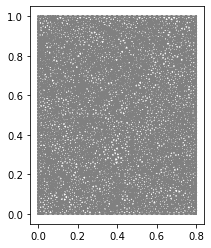

In [10]:
plot(mesh_new)

In [8]:
# Generate training data

#x_slit = 0.5*np.ones((500, 2))
#xs=np.random.uniform(0.5,1,500)
#x_slit[:,0]=xs

x_right = 1*np.ones((1000, 2))
for i in range(0,1000):
    x_right[i][1]=np.random.uniform(0,1)
    
x_left = 0*np.ones((1000, 2))
for i in range(0,1000):
    x_left[i][1]=np.random.uniform(0,1)
    
x_top = 1*np.ones((1000, 2))
x_top[:,0]=np.random.uniform(0,1,1000)

x_bottom = 0*np.ones((1000, 2))
x_bottom[:,0]=np.random.uniform(0,1,1000)



#mesh_new = dl.refine(UnitSquareMesh(20, 20))
#coordinates_train = np.zeros((4000, 2))

#for i in range(0,4000):
 #   coordinates_train [i]=[np.random.uniform(0.5,1),np.random.uniform(0,1)]
    
#for i in range(2000,3990):
 #   coordinates_train [i]=[np.random.uniform(0.5,1),np.random.uniform(0.5,1)]

#for i in range(0,4000):
 #   coordinates_train [i]=[np.random.uniform(0.0,0.5),np.random.uniform(0.0,1)]
    
#for i in range(3000,4000):
 #   coordinates_train [i]=[np.random.uniform(0.0,0.5),np.random.uniform(0.7,1)]

#for i in range(3000,4000):
 #   coordinates_train [i]=[np.random.uniform(0.5,1),np.random.uniform(0.0,0.5)]

#for i in range(3000,4000):
    #coordinates_train [i]=[np.random.uniform(0.5,1),np.random.uniform(0.5,1)]
    
c_train=np.concatenate((x_right,x_left,x_top,x_bottom),axis=0)


np.random.shuffle(c_train)

solution_train=np.zeros(len(c_train))
for i in range(len(c_train)):
  solution_train[i]=u(c_train[i])

In [7]:
len(solution_train)

6561

In [9]:
# Generate test data

coordinates_test=np.random.rand(5000,2)
np.random.shuffle(coordinates_test)

solution_test=np.zeros(len(coordinates_test))
for i in range(len(coordinates_test)):
  solution_test[i]=u(coordinates_test[i])


In [15]:
coordinates_train = 0.5*np.ones((500, 2))

0.2194312626768965

array([[1. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

In [5]:
gauss_points = loadmat('gauss_points_new.mat')
gauss_points=np.array(list(gauss_points.values()))[-1]

solution_gauss=np.zeros(len(gauss_points))
for i in range(len(gauss_points)):
  solution_gauss[i]=u(gauss_points[i])

400

In [10]:
np.savetxt('input_train.txt',c_train)
np.savetxt('input_test.txt',coordinates_test)

In [11]:
np.savetxt('output_train.txt',solution_train)
np.savetxt('output_test.txt',solution_test)        

In [6]:
 np.savetxt('gauss_solution.txt',solution_gauss)

NameError: name 'tf' is not defined